## 통계적 추정

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3

'%.3f'

In [3]:
df = pd.read_csv('./ch4_scores400.csv')
print(df.head())
scores = np.array(df['score'])
df.shape

   score
0     76
1     55
2     80
3     80
4     74


(400, 1)

In [4]:
# 모평균, 모분산
p_mean = np.mean(scores)
p_var = np.var(scores)
p_mean, p_var

(69.53, 206.6691)

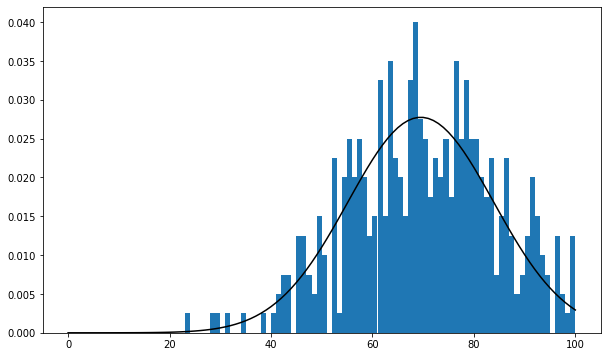

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='k')
ax.hist(scores, bins=100, range=(0,100), density=True)

plt.show()

In [6]:
# A학생이 무작위 추출한 표본 크기가 20인 표본
np.random.seed(0)
n=20
sample = np.random.choice(scores,n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [7]:
# 표본크기가 20인 표본 10000개 추출
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

### 점추정
- 모평균이나 모분산 등의 모수를 하나의 수치로 추정
- 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성(편향성)이라고 하며 불편성을 가진 추정량을 불편추정량이라고 한다.
- 표본평균이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 이 불편성이다.
- 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해가는 성질을 일치성이라고 하며 일치성을 지닌 추정량을 일치추정량이라고 함
- 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 말할 수 있다.


In [8]:
df = pd.read_csv('./ch4_scores400.csv')
print('보평균:',df.score.mean())

np.random.seed(1111)
n = 20
n_samples = 10000
samples = np.random.choice(scores, (n_samples,n))

sample_means = np.mean(samples, axis=1)

print('모분산:', df.score.var())
sample_u_vars = np.var(samples, axis=1, ddof=1)
print('표본분산, 분산 :', np.mean(sample_means), np.mean(sample_u_vars))

보평균: 69.53
모분산: 207.18706766917293
표본분산, 분산 : 69.53799999999998 206.67808263157895


In [9]:
# 표본평균의 평균
sample_means = np.mean(samples, axis=1)
np.mean(sample_means)

69.53799999999998

In [10]:
# 표본크기를 백만으로 할 때의 표본평균
np.mean(np.random.choice(scores,int(1e6)))

69.542954

In [11]:
# A학생이 추출한 표본의 표본평균
np.random.seed(0)
n=20
sample = np.random.choice(scores,n)
s_mean = np.mean(sample)
s_mean

70.4

In [12]:
np.var(scores)

206.6691

In [13]:
# 표본분산이 모분산의 불편추정량이 되는지 대수법칙으로 확인
sample_vars = np.var(samples, axis=1)
np.mean(sample_vars)

196.34417850000003

In [14]:
#  대수의 법칙 사용해서 불편분산의 기대값 확인하기
sample_u_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_u_vars)

206.67808263157895

In [15]:
# 표본크기 100만으로 확인하기
np.var(np.random.choice(scores, int(1e6)), ddof=1)

207.12823418906518

### 구간추정

#### 정규분포의 모평균 구간추정 : 모분산을 알고 있는 경우

In [24]:
# A학생이 추출한 표본의 표본평균
np.random.seed(0)
n=20
sample = np.random.choice(scores,n)
s_mean = np.mean(sample)
s_mean

# A 학생 추출한 표본으로 불편분산 계산
u_var = np.var(sample, ddof=1)
u_var

158.25263157894742

In [23]:
# A학생 표본 데이터로 모평균의 95% 신뢰구간 구하기
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)

lcl, ucl

(64.09956018535247, 76.70043981464754)

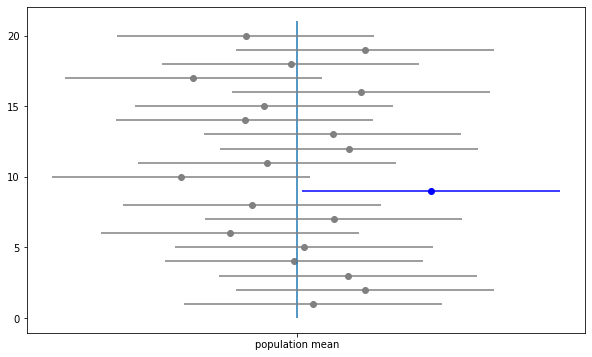

In [25]:
# 신뢰구간의 계산 20번 수행하고 모평균을 몇번 포함하는지 그리기 ( 중앙 세로선 평균, 모평균 모함하지 않은 구간추정은 다른 색)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 20
ax.vlines(p_mean, 0,21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color='gray')
        ax.hlines( n_samples-i, lcl, ucl, color='gray')
    else:
        ax.scatter(s_mean_, n_samples-i, color='b' )
        ax.hlines(n_samples-i, lcl, ucl, color='b' )
ax.set_xticks([p_mean])
ax.set_xticklabels(['population mean'])

plt.show()

In [29]:
# 신뢰구간을 1만 번 계산하고 모평균이 포함된 것은 몇 %인지 시뮬레이션 으로 알아보기
rv = stats.norm()
cnt = 0

for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        cnt += 1
cnt / len(samples)

0.951

#### 정규분포의 모분산 구간추정(모평균을 모름)

In [30]:
sample_y = sample_u_vars * (n-1) / p_var
sample_y

array([11.303, 15.767, 18.102, ..., 19.435,  9.265, 18.625])

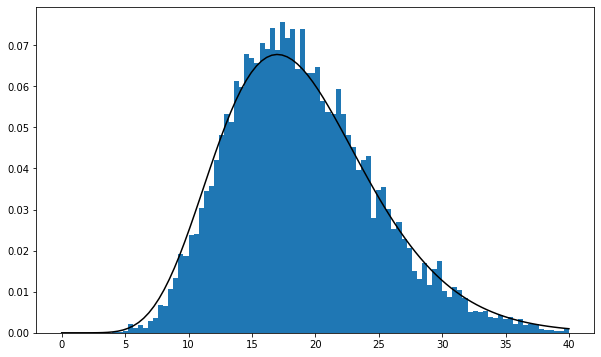

In [33]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 40, 100)
rv = stats.chi2(df=n-1)
ax.plot(xs, rv.pdf(xs), color='k')
hist, _, _ = ax.hist(sample_y, bins=100,
                     range=(0, 40), density=True)

plt.show()

In [34]:
rv = stats.chi2(df=n-1)
lcl = (n-1) * u_var / rv.isf(0.025)
hcl = (n-1) * u_var / rv.isf(0.975)

lcl, hcl

(91.52471947132238, 337.5955129124592)

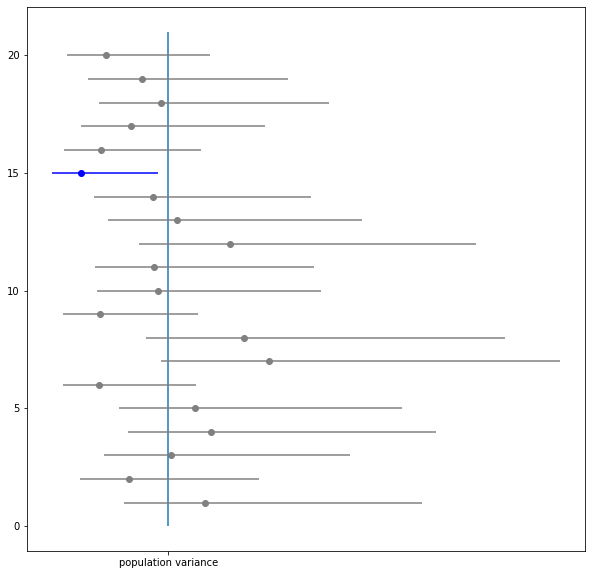

In [35]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.chi2(df=n-1)
n_samples = 20
ax.vlines(p_var, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, 'gray')
    else:
        ax.scatter(u_var_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, 'b')
ax.set_xticks([p_var])
ax.set_xticklabels(['population variance'])

plt.show()

In [36]:
rv = stats.chi2(df=n-1)
cnt = 0
for sample_ in samples:
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        cnt += 1
        
cnt / len(samples)

0.964

#### 정규분포의 모평균(모분산을 알지 못하는) 구간추정

In [37]:
rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)

lcl, ucl

(65.31244886603886, 77.08755113396114)

#### 베르누이 분포의 모평균의 구간추정

In [39]:
enquete_df = pd.read_csv('./ch10_enquete.csv')
enquete = np.array(enquete_df['known'])
n = len(enquete)
enquete[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [40]:
s_mean = enquete.mean()
s_mean

0.709

In [41]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean*(1-s_mean)/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean*(1-s_mean)/n)

lcl, ucl

(0.6808474522924337, 0.7371525477075662)

#### 포아송 분포의 모평균의 구간추정

In [42]:
n_access_df = pd.read_csv('./ch10_access.csv')
n_access = np.array(n_access_df['access number'])
n = len(n_access)
n_access[:10]

array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8], dtype=int64)

In [43]:
s_mean = n_access.mean()
s_mean

10.444444444444445

In [44]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)

lcl, ucl

(9.697953549598202, 11.190935339290688)

#### 과제 0905_1
p266 ~ p291 예제 코드를 풀어보세요.

#### 과제 0905_2
- 다음 용어를 예를들어 설명하세요.
  불편성, 일치성, 불편분산,
- 카이제곱분포,t분포가 구간 추정에 활용된 사례를 만들어 설명하세요.
 

불편성:  표본으로부터 구한 통계량의 기대치가 추정하려 하는 모수의 실제 값에 같거나 가까워지는 성질을 의미.
일치성 : 표본의 크기가 커감에 따라서 표본의 통계량이 모집단의 모수와 일치하게 될 경우